# SLU12 - Linear Algebra & NumPy, Part 1

### Learning Notebook 1/2 - vectors

*Here we start with the most important concept in Linear Algebra, the vector, and learn about the NumPy library and its main object, the numpy array. In Learning Notebook 2/2 we will then extend this concept and all its magical properties to matrices.*

---

**What's in this notebook**

1. [Vectors](#1.-Vectors)

  1.1 [Vector definition](#1.1-Vector-definition) - vector definition, representations and __the transpose__ of a vector  
  1.2 [Vector norm](#1.2-Vector-norm)  
  1.3 [Vector operations: multiplication by scalar and addition](#1.3-Vector-operations:-multiplication-by-scalar-and-addition)  
  1.4 [Linear combinations and linear independence
](#1.4-Linear-combinations-and-linear-independence)  
  1.5 [Representing all vectors in space](#1.5-Representing-all-vectors-in-space)  
  1.6 [Dot product](#1.6-Dot-product)  
  1.7 [Orthogonal vectors](#1.7-Orthogonal-vectors)  
  1.8 [Vectors recap](#1.8-Vectors-recap)  


2. [Introduction to NumPy arrays](#2.-Introduction-to-NumPy-arrays)

  2.1 [The NumPy package](#2.1-The-NumPy-package)  
  2.2 [The `ndarray`](#2.2-The-ndarray) - the numpy array, dimensions and shape of an array  
  2.3 [Vectors and linear algebra using NumPy](#2.3-Vectors-and-linear-algebra-using-NumPy) - basic linear algebra operations on vectors

---

### Imports

In [1]:
# numpy is the package we're going to learn about
# it is a widespread convention to import numpy using the alias np
# this convention makes your code more readable, so do use it
import numpy as np

# auxiliary stuff
import utils

<br>
<img src="media/ds_without_linalg.jpg" width="580"/>
<br>

---

You probably know a lot about programming in Python at this point, so take a moment to feel proud of yourself.

Now, to become a good data professional, you also need Mathematics. Why? Because just about any machine learning algorithm you will use is built on linear algebra, calculus and statistics concepts.

Blindly feeding data into an ML algorithm just because you know it predicts stuff, will leave you in the same situation of a cat owner who puts his cat into the washing machine just because its purpose is to clean...

#### *Do not be a negligent cat owner...*

<img src="./media/cat_washing_machine.jpg" width="300"/>

---

By the end of SLUs 12 and 13, you'll be familiar with all the linear algebra you need to read the matrix form solution to the *multiple linear regression algorithm*, the most popular starting point for machine learning students:

$$ \mathbf{\beta} = (X^TX)^{-1}(X^T\mathbf{y})$$

That's a lot of Maths! 🙀

---

###  Recommendations for units (SLU12 + SLU13)

**1 - Don't rush it**: linear algebra concepts take time to internalize;

**2 - Follow the sequence**: each topic builds upon the one before;

**3 - Solve the (optional) *pen and paper exercises***: they serve to help you check your learning;

**4 - Reach out on Slack if you get stuck**: [*There is no such thing as a dumb question*](https://en.wikipedia.org/wiki/Carl_Sagan).

_The most important thing in SLUs 12+13 is to get some intuition on the basic concepts in Linear Algebra, not to master it in 2 weeks!! If Mathematics is not your cup of tea, but you still want to become a good (and responsible) data scientist, you can and definitely should continue studying Linear Algebra **and** Statistics after the course._

---

## 0. Intro

### What is Linear Algebra?

The formal definition of Linear algebra as per [Wikipedia](https://en.wikipedia.org/wiki/Linear_algebra) is that it is the branch of Mathematics concerning linear equations and functions, and how we represent them in vector spaces and matrices. If you're new to Linear Algebra however, this definition will probably not be very helpful. So to put it more simply, [linear algebra is about](https://machinelearningmastery.com/gentle-introduction-linear-algebra/) using "arithmetic on columns of numbers called __vectors__ and arrays of numbers called __matrices__, to create new columns and arrays of numbers."

> Note that the definition above is quite simplistic, to the level of [Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) probably not approving it if he were alive. But it serves our purposes.

---

## 1. Vectors

<img src="./media/one_does_not_simply.jpg"/>

### Vectors in 1-Dimensional (1D) spaces

Consider the kitten below, walking timidly at a speed of  $0.1$ m/s in order to reach his food bowl:

<img src="./media/kitten_walking.png" width="600"/>

The __velocity__ of the kitten is a quantity **defined by both a magnitude and a direction**, which we call the velocity **vector** of the kitten, $\mathbf{v} = [0.1]$ m/s:
- The value $0.1$ corresponds to a **magnitude** which tells us how fast the kitten is walking;
- We know the kitten is walking in a __straight line__ to the food bowl, so we can define his **direction**.



We could draw this 1D (1-dimensional) vector in a 1D [coordinate system](https://en.wikipedia.org/wiki/Coordinate_system), as follows:

<img src="./media/kitten_vector.PNG" width="200"/>

---

Our kitten has now eaten all his food, and he's staring at you, asking for a refill:

<img src="./media/kitten_stopped.png" width="600"/>

He won't move until you feed him, and now we could represent his zero velocity by the zero vector $\mathbf{v} = [0]$ m/s.

---

### Vectors in 2-Dimensional (2D) spaces

A **2-dimensional vector** belongs to the 2-dimensional real coordinate space, $\mathbb{R}^2$, and we can plot it using a Cartesian coordinate system.

<img src="./media/vector_2d.png" width="240"/>

Notice that the vector $[-1, 2]$ has its tail located at the origin of the x-y plane, $(0,0)$, and its tip (head) located at the point $(-1, 2)$. To go from tail to tip, we walk 1 step leftwards (x-coordinate = -1) and 2 steps upwards (y-coordinate = 2).

📌 In linear algebra it is standard to root the vector at the origin of the coordinate system.

We can draw the 2D-vector of a cyclist's velocity climbing a hill at 12 km/h, $\mathbf{v}$, on the xy-plane, where y is perpendicular to the centre of the Earth:

<img src="./media/cyclist.png" width="320"/>

> 📝 **Pen and paper exercise 1**: Grab a pen (actually pencil+rubber might be better) and a piece of paper and draw the vectors $[-1, 2]$, $[2, -1]$ and $[1, 2]$ on the xy-plane. Notice that they all have the same *magnitude* (length) but different *direction*s.

### Vectors in 3-Dimensional (3D) spaces

A **3-dimensional vector**  belongs to the 3-dimensional real coordinate space, $\mathbb{R}^3$. We can draw it on the xyz coordinate system, using the same logic as for the xy-plane.

To get from the tail to the tip of the vector, for the 1st component (x coordinate) you would walk parallelly to the yz [plane](https://en.wikipedia.org/wiki/Plane_(geometry)), for the 2nd component (y coordinate) you would walk parallelly to the xz plane, and for the 3rd element (z coordinate), you would walk parallelly to the xy plane.

You can play with your own 3-D vectors in this applet: https://www.intmath.com/vectors/3d-space-interactive-applet.php.

### Vectors in $n$-dimensional spaces

Now what about a **4-dimensional vector**?

<img src="./media/brain_says_no.jpg" width="380"/><br>

The human brain is not able to *visualize* more than 3 dimensions, although it's possible to overcome this limitation with some brilliant [interactive visualizations](https://ciechanow.ski/tesseract/) or the help of [Carl Sagan](https://vimeo.com/199561184)....

Though that's a good exercise, it doesn't really matter whether or not you can see in 4D. In linear algebra you can extend properties of vectors and matrices, and the operations between them, to **any number of dimensions**.

### 1.1 Vector definition

<a name="vector_def"></a>
<div class="alert alert-block alert-info">
    An <b>$m$-dimensional vector $\mathbf{x}$</b> is an ordered list of $m$ scalars represented as $\mathbf{x} = \left[x_1, x_2,..., x_m\right]$, $x_i \in \mathbb{R}$. It has a <b>magnitude</b> and a <b>direction</b>.
</div>

**Some notes on mathematical notation:**

- $x_i \in \mathbb{R}$ means that each scalar $x_i$ in the vector belongs ($\in$) to the set of all real numbers ($\mathbb{R}$)
- $m$ belongs to the set of all positive integer numbers, $m \in \mathbb{Z}^+$
- when describing vectors we usually use square brackets `[]` and **not** round brackets `()`, although these might be used somewhere else.
- Vectors are usually represented by bold lowercase letters and scalars by a non-bold lowercase letter. However, you might find different notations (e.g. arrow over lowercase letter, $\overrightarrow{v}$, or arrow and uppercase such as the [force vector](https://en.wikipedia.org/wiki/Force) $\overrightarrow{F}$)

**Real coordinate space**
> An $m$-dimensional vector belongs to a [real coordinate space](https://en.wikipedia.org/wiki/Real_coordinate_space) of $m$ dimensions, denoted by $\mathbb{R}^m$, where we have the set of all different $m$-dimensional vectors.

#### Vectors can be defined either by their magnitude and direction (geometrically) or as a list of numbers (numerically)

(a) **Geometrically** speaking, a vector is an arrow pointing in space, with a given *magnitude* (length), and a *direction*, describing where the arrow points to.  
(b) **Numerically** speaking, you can think of the same vector as an ordered list of scalars (real numbers).

**Equality of vectors**

* $\mathbf{u}$ and $\mathbf{v}$ are equal if they have the same magnitude and direction, **which implies** that the ordered lists which represent them are equal, **element-wise**.

#### 1.1.1 Vector representations and the transpose

We can represent **the same** vector in several ways. For example, we can represent a given *4-dimensional vector* as:

* an ordered list, $\left[0,\; -1,\; 2.6,\; \sqrt{3}\right]$, 
<br>
<br>
* a **row vector**,
$
  \begin{bmatrix} 
  0 & -1 & 2.6 & \sqrt{3}\\ 
  \end{bmatrix}
$, 

* or its **transpose**, a **column vector**,
$
  \begin{bmatrix} 
  0 & -1 & 2.6 & \sqrt{3}\\ 
  \end{bmatrix}^T = 
  \begin{bmatrix} 
  0 \\ 
  -1 \\ 
  2.6 \\
  \sqrt{3} \\
  \end{bmatrix}
$.

The relevance of the type of representation we use will become evident when we introduce matrices. For now, just know that the row representation of a vector is called the **transpose** of its column representation, and vice versa.

### 1.2 Vector norm

**Definition**


<div class="alert alert-block alert-info">
    The <b>norm of an $m$-dimensional vector</b> $\mathbf{x} = \left[x_1, x_2, ..., x_m\right]$, $x_i\in \mathbb{R}$, also known as the magnitude or length, is defined as $\|\mathbf{x}\| = \sqrt{x_1^2 + x_2^2 + ... + x_m^2}$.
</div>

**Explanation**

The **magnitude** of a 2-dimensional vector, also called the **norm** or the **length**, can be determined by the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem), which says that "In a right angled triangle, the square of the hypotenuse is equal to the sum of the squares of the other two sides".

On the xy-plane below, the dashed lines represent the two other sides of a right angled triangle, and the hypothenuse corresponds to the length of the vector:

<br>
<img src="./media/vector_2d.png" width="240"/>

We can represent the vector on the image by an ordered list: $\mathbf{a} = [a_1, a_2]$, with components $a_1 = -1$ ($x$ coordinate) and $a_2 = 2$ ($y$ coordinate).

Let's use the Pythagorean theorem to **find the norm of $\mathbf{a}$**, $\| a\|$:

$$\| a\|^2 = a_1^2 + a_2^2$$

$$\| a\| = \sqrt{a_1^2 + a_2^2} = \sqrt{(-1)^2 + (2)^2} = \sqrt{5} $$

You can actually use this formula with any $m$-dimensional vector. (*It's a kind of magic...* 🎵)

> 📝 **Pen and paper exercise 2**: Calculate the norm of the vectors $[-1, 2]$, $[2, -1]$ and $[1, 2]$, which you've drawn in the last exercise. You should find that they all have the same norm. Find one more vector with the same norm as them. 
>
> **Notice that** there is an infinite number of 2-D vectors with the same norm (length).

---

### Ever asked yourself...

<br>

<img src="./media/straightforward.jpg" width="380"/>

[*bad pun source*](https://math.stackexchange.com/questions/62789/what-does-linear-mean-in-linear-algebra#comment146861_62789)

Now to the [serious answer](https://math.stackexchange.com/questions/62789/what-does-linear-mean-in-linear-algebra/62791#62791): linear algebra is "linear" because it's about linear functions. Remember learning about $y = mx + b$, the equation for the line, in math class?

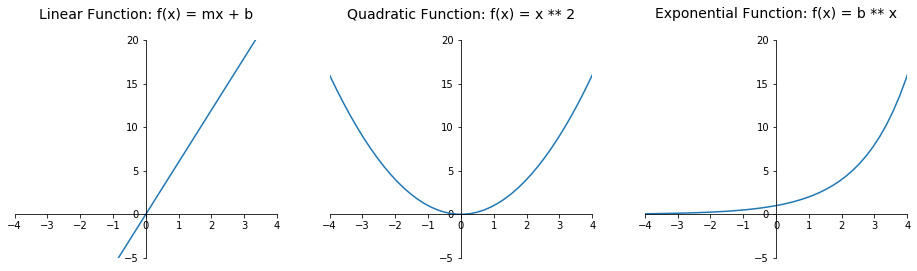

In [2]:
# run this cell and check the plots below
utils.plot_school_functions()

In linear algebra we deal with linear functions (*deal with it!*). This means that all transformations we do on our data are based on linear relations, just like the line on the first plot. We don't need to worry about polynomial functions, exponentials, or other evil sorceries. Only simple, beautiful, linear magic. 😍😃

Simple, yet powerful.

---

### 1.3 Vector operations: multiplication by scalar and addition

#### 1.3.1 Multiplying a vector by a scalar

What happens with a vector if we multiply it by a scalar?

Consider the vector $\mathbf{u}=\begin{bmatrix}1\\2\\\end{bmatrix}$. On the image below you can see several vectors that result from multiplying the vector $\mathbf{u}$ by different scalars.

<br><img src="./media/vector_scaling.png" width="400"/>

**Multiplying $\mathbf{u}$ by -1:** $\hspace{5cm}\mathbf{v}=-1\cdot \mathbf{u}=-1\cdot\begin{bmatrix}1\\2\\\end{bmatrix}$ $=\begin{bmatrix}-1\times 1\\-1\times 2\\\end{bmatrix}=$ $\begin{bmatrix}-1\\-2\\\end{bmatrix}$

Multiplying a 2D vector by $-1$ causes it to rotate $180^{\circ}$ ($\pi$ radians) around the origin. Its *magnitude* (norm) remains the same, but the *direction* changes.

**Multiplying $\mathbf{u}$ by 0:**$\hspace{5cm} 0 \cdot \mathbf{u}=0\cdot\begin{bmatrix}1\\2\\\end{bmatrix} = $ $\begin{bmatrix}0\\0\\\end{bmatrix}$

Multiplying any vector by $0$ results in a vector with the same dimension, where all components are zero (the zero vector).

**Multiplying $\mathbf{u}$ by 2**$:\hspace{5cm} \mathbf{w}=2\cdot \mathbf{u}=2\cdot\begin{bmatrix}1\\2\\\end{bmatrix}$ $= \begin{bmatrix}2\\4\\\end{bmatrix}$

Multiplying a vector by a positive scalar increases its *magnitude* but does not affect its *direction*.

**Multiplying $\mathbf{u}$ by 1:**$\hspace{5cm} 
1\cdot\mathbf{u}=1\cdot\begin{bmatrix}1\\2\\\end{bmatrix} = $ $\begin{bmatrix}1\times 1\\1\times 2\\\end{bmatrix} = \begin{bmatrix}1\\2\\\end{bmatrix} = \mathbf{u}$

Multiplying any vector by the scalar 1 does not change the vector (**identity property**).

> Note that the dot symbol $\cdot $ in the expressions above denotes multiplication, however as we'll see in a few sections, when it is written **between two vectors** it means **dot product** instead.

> 📝 **Pen and paper exercise 3**: Multiply the vector $\mathbf{u}$ by the scalar -2. What happens to its *magnitude* and *direction*?

---

#### 1.3.2 Addition and subtraction

To add two $m$-dimensional vectors, we simply add the corresponding components from each vector.

For example, we can add vectors $\mathbf{u} = \begin{bmatrix} 1\\ 2\\\end{bmatrix}$ and $\mathbf{v} = \begin{bmatrix} 3\\ 1\\\end{bmatrix}$ as follows:  
$\hspace{.2cm} \mathbf{w} = \mathbf{u} + \mathbf{v} = \begin{bmatrix} 1\\ 2\\\end{bmatrix} + $ $\begin{bmatrix} 3\\ 1\\\end{bmatrix} = $ $\begin{bmatrix} 1 + 3\\ 2 + 1\\\end{bmatrix} = $ $\begin{bmatrix} 4\\ 3\\\end{bmatrix}$

**Geometrical visualization:**

<img src="./media/vector_addition.png" width="340"/>

The vectors $\mathbf{u}$, $\mathbf{v}$ and $\mathbf{w}$ are plotted on the image above.

Notice we place the tail (origin) of $\mathbf{b}$, which is equivalent to the vector $\mathbf{v}$ (equal in magnitude and direction), to the tip of vector $\mathbf{u}$.

Hence we walk 3 steps rightwards (x-coordinate of $\mathbf{v}$ = 3) and 1 step upwards (y-coordinate of $\mathbf{v}$ = 1), getting to the tip of $\mathbf{w}$, the result of adding $\mathbf{u}$ and $\mathbf{v}$.

**Vector addition is commutative:**

Notice that we could also start at vector $\mathbf{v}$, add vector $\mathbf{a}$ (the equivalent of vector $\mathbf{u}$), and we would still get the vector $\mathbf{w}$ as a result. This means that the **addition between vectors is commutative**. The same applies to any two or more $m$-dimensional vectors added together.

> ❗ You **cannot** add vectors with different dimensions!!
> 
> For example, if you tried to add $[1, 2]$ with $[1, 2, 3]$, you would have no corresponding component on the 1st vector to add to the 3rd component of the second vector.

> 📝 **Pen and paper exercise 4**: Draw the vector $\mathbf{x} = \mathbf{u} - \mathbf{v}$ on the xy-plane:
> - Multiply the vector $\mathbf{v}$ by the scalar $-1$ and draw the resulting vector, $\mathbf{-v}$;
> - Add $\mathbf{-v}$ to vector $\mathbf{u}$;

**Properties of vector addition and scalar multiplication (for any $m$-dimensional vectors):**

$\;\;\text{1. }\;\; \mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u}$

$\;\;\text{2. }\;\; \mathbf{u} + \mathbf{0} = \mathbf{u}$

$\;\;\text{3. }\;\; c\left(\mathbf{u} + \mathbf{v}\right) = c\mathbf{u} + c\mathbf{v},\hspace{.2cm} c\in \mathbb{R}$

$\;\;\text{4. }\;\; \left(cd\right)\mathbf{u} = c\left(d\mathbf{u}\right),\hspace{.2cm} c,d \in \mathbb{R}$

$\;\;\text{5. }\;\; \mathbf{u} + (\mathbf{v} + \mathbf{w}) = (\mathbf{u} + \mathbf{v}) + \mathbf{w}$

$\;\;\text{6. }\;\; \mathbf{u} + (-\mathbf{u}) = \mathbf{0}$

$\;\;\text{7. }\;\; (c + d) \mathbf{u} = c \mathbf{u} + d \mathbf{u}$

$\;\;\text{8. }\;\; 1\mathbf{u} = \mathbf{u}$

> 📝 **Pen and paper exercise 5 (this one is for the skeptical minds)**: Choose 2 of the properties above and check their veracity.
>
> You can use, for example, the vectors $\mathbf{u} = \begin{bmatrix}1\\ 2\end{bmatrix},\;\;$
> $\mathbf{v} = \begin{bmatrix}2\\ 4\end{bmatrix},\;\;$
> $\mathbf{w} = \begin{bmatrix}0\\ -1\end{bmatrix}\;\;$
> and the scalars (real numbers) $c=-0.2$ and $d=\frac{1}{4}$.

If you "find out" any of the rules is wrong, I'm sorry but you probably made some error on the arithmetics along the way.

***Trust me, linear algebra will never fail you. Never. Ever.***

---

<img src="./media/we_will_see.gif"/>

---

### 1.4 Linear combinations and linear independence

#### 1.4.1 Linear combination

Every time we scale vectors and add them together, we're performing a **linear combination**. This is what it looks like for 2 $m$-dimensional vectors:

$$c_1 \cdot \begin{bmatrix} u_1\\ u_2\\ ... \\ u_m\\\end{bmatrix}+c_2\cdot\begin{bmatrix}v_1\\v_2\\\dots\\v_m\\\end{bmatrix}=\begin{bmatrix}c_1\cdot u_1 + c_2\cdot v_1\\ c_1\cdot u_2 + c_2\cdot v_2\\ ... \\ c_1\cdot u_m + c_2\cdot v_m\\\end{bmatrix},\hspace{.2cm}  c_i\in \mathbb{R}$$

In the *pen and paper* exercise **4**, you basically performed a linear combination between vectors using scalars $1$ and $-1$.

---

We can have a linear combination of $n$ vectors, as follows:

$$c_1\cdot \mathbf{x_1} + c_2\cdot \mathbf{x_2} + ... + c_n\cdot \mathbf{x_n},\hspace{.2cm} c_i\in \mathbb{R},\hspace{.2cm}  \mathbf{x_i}\in\mathbb{R}^m$$

Note that $\mathbf{x_1}, \mathbf{x_2},..., \mathbf{x_n}$ are **not vector components but actual vectors** (bold lowercase letter).

---

#### Example

For $\mathbf{v_1} = \begin{bmatrix}1\\-1\end{bmatrix}$, $\mathbf{v_2} = \begin{bmatrix}2\\2\end{bmatrix}$ and $\mathbf{w} = \begin{bmatrix}4\\0\end{bmatrix}$, we have $w = 2\cdot \mathbf{v_1} + 1\cdot\mathbf{v_2}$. Thus $\mathbf{w}$ can be written as a linear combination of $\mathbf{v_1}$ and $\mathbf{v_2}$.

---

#### 1.4.2 Linear independence

**Definition**

If we have two vectors $\mathbf{a}$ and $\mathbf{b}$, and $\mathbf{b}$ can be expressed as $c\cdot \mathbf{a}, c\in \mathbb{R}$, we say that $\mathbf{a}$ and $\mathbf{b}$ are **linearly dependent**, or collinear. If either one cannot be expressed as a linear combination of the other, then we say they are **linearly independent**, or non-collinear.

**Explanation**

For example, $[2, 1]$ and $[4, 2]$ are linearly dependent. You can find a constant that multiplied by one will give you the other. For example,  $[2, 1]\times 2 = [4, 2]$ or  $[4, 2]\times \frac{1}{2} = [2, 1]$


The vectors $[2, 1]$ and $[0, 1]$, on the other hand, are linearly independent. As much as you may try, you can never find a constant that multiplied by one of them will yield the other.



---

Generally, a set of vectors is said to be [linearly dependent](https://en.wikipedia.org/wiki/Linear_independence) **if at least one of the vectors in the set** can be defined as a **linear combination** of the others.

> 📌 **Tip**: The concept of linear dependence is extremely important in data science!

<img src="./media/noted.gif" width="500"/>

---

### 1.5 Representing all vectors in space

<img src="./media/linear_combinations.png" width="400"/>

In the image above we can see the resulting vectors of 4 distinct linear combinations of vectors $\mathbf{u}=[1,2]$ and $\mathbf{v}=[3,1]$, namely:

- $1\cdot \mathbf{u} + 1\cdot \mathbf{v}$
- $2\cdot \mathbf{u} + 1\cdot \mathbf{v}$
- $-1\cdot \mathbf{u} + 1\cdot \mathbf{v}$
- $1\cdot \mathbf{u} + (-1)\cdot \mathbf{v}$

❗ Actually, if you had the time (*infinite time*) to plot all possible linear combinations of vectors $\mathbf{u}$ and $\mathbf{v}$, you would fill the entire xy-plane, and get **all 2-dimensional vectors, this is, all vectors in $\mathbb{R}^2$**.

**But only because** you used **2** vectors in **2-D** that are **linearly independent**.

---

#### Skeptical minds corner

So, we could **NOT** create the set of all the 2-dimensional vectors if our vectors were **linearly Dependent**.

Feeling skeptic about this?

If this doesn't yet make sense to you, write down some linear combinations, i.e. ($c\mathbf{u} + d\mathbf{v}$), for the collinear vectors $\mathbf{u}=[1,2]$ and $\mathbf{v} = [2,4]$, varying scalars $c$ and $d$ as much as you want.

Now try not to get [stuck on the line](https://www.theguardian.com/politics/video/2012/aug/01/boris-johnson-stuck-zip-wire-video)...

<img src="./media/stuck_line.png" width="400"/>

---

**We can define an $n$-dimensional space with linear combinations of $n$ linearly independent vectors**

- in a **2D** space, we need **2 and only 2 linearly independent vectors** to define all other 2-dimensional vectors as linear combinations of these 2 vectors;
- in a **3D** space, we need **3 and only 3 linearly independent vectors** to define all other 3-dimensional vectors as linear combinations of these 3 vectors;
- and so on and so forth.

This also means that, for example, if you define 3 vectors in 2-dimensional space, any one of them will be a linear combination of the other two.

You see, linear algebra is a minimalist: if you can use only 2 vectors to represent a 2D space, why waste a 3rd one?

### 1.6 Dot product

#### Definition

We already know how to multiply vectors by scalars and add vectors together. But can we multiply one vector by another? Yes we can! Actually, we can do it in [several ways](https://en.wikipedia.org/wiki/Multiplication_of_vectors). However, let's just focus on the most simple one: the **dot product**, a.k.a. the **scalar product** -- because the result is a scalar.


<div class="alert alert-block alert-info">
    The <b>dot product</b> of two $m$-dimensional vectors $\mathbf{u}=[u_1, u_2, ..., u_m]$ and $\mathbf{v}=[v_1, v_2, ..., v_m]$ is a <b>scalar</b> given by:
    
$$\mathbf{u}\cdot \mathbf{v} = u_1 v_1 + u_2 v_2 + ... + u_m v_m$$
</div>

Consider the vectors $\mathbf{a} = [1, 2, 0]$ and $\mathbf{b} = [-1, 4, -2]$. The dot product between $\mathbf{a}$ and $\mathbf{b}$ is:

$$\mathbf{a}\cdot \mathbf{b} = 1\times (-1) + 2\times 4 + 0\times (-2) = -1 + 8 + 0 = 7$$

---

**Another way to determine the dot product**

You might also find the dot product of two vectors written as $\mathbf{u} \cdot \mathbf{v} = \|u\|\|v\|\cos{\theta} = \|v\|\|u\|\cos{\theta}$.

This means that $\mathbf{u} \cdot \mathbf{v}$ is the magnitude of $\mathbf{v}$ times the magnitude of the component of $\mathbf{u}$ that points along $\mathbf{v}$, namely $\|u\|\cos{\theta}$ (projection of $\mathbf{u}$ onto $\mathbf{v}$):

<img src="./media/projection_u_onto_v.png" width="400"/>

We can therefore determine the angle between any two *non zero* vectors by using the relation: $\;\;\;\;\mathbf{u} \cdot \mathbf{v} = \|u\|\|v\|\cos{\theta} \iff \cos{\theta} = \frac{\mathbf{u} \cdot \mathbf{v}} {\|u\|\|v\|}$

---

> 📝 **Pen and paper exercise 6 (for the Math nerds)**: Find the angle $\theta$ (in degrees or radians) between the vectors $\mathbf{u} = \begin{bmatrix}1\\ 0\end{bmatrix}$ and $\mathbf{v} = \begin{bmatrix}2\\ 2\sqrt{3}\end{bmatrix}$ using the formula $\mathbf{u} \cdot \mathbf{v} = \|u\|\|v\|\cos{\theta}$.
> - Calculate $\mathbf{u}\cdot\mathbf{v}$ using the [dot product formula](#1.6-Dot-product);
> - Find $\|u\|\|v\|$ using the formula for the [norm of a vector](#1.2-Vector-norm).
>
> You get **3 ⭐️s** if you solve this using a calculator and **5 ⭐️s** if you can solve it without a calculator (you may use the [unit circle](https://en.wikipedia.org/wiki/Unit_circle) below).

<img src="./media/unit_circle.png" width="300"/>

Once more, all of this applies to any two vectors in any $m$-dimensional real space.

---

#### 1.6.2 Properties of the dot product

You don't need to memorize them all, just know they exist.

$\;\;\;\;\;\text{1. }\;\; \mathbf{u} \cdot \mathbf{u} = \|\mathbf{u}\|^2$

$\;\;\;\;\;\text{2. }\;\; \mathbf{0} \cdot \mathbf{u} = \mathbf{0}$

$\;\;\;\;\;\text{3. }\;\; \mathbf{u} \cdot \mathbf{v} = \mathbf{v} \cdot \mathbf{u}$

$\;\;\;\;\;\text{4. }\;\; (c \mathbf{u}) \cdot \mathbf{v} = c (\mathbf{u} \cdot \mathbf{v})$

$\;\;\;\;\;\text{5. }\;\; \mathbf{u} \cdot \mathbf{v} = \|\mathbf{u}\|\|\mathbf{v}\|\cos{\theta}$

$\;\;\;\;\;\text{6. }\;\; \mathbf{u} \cdot (\mathbf{v} + \mathbf{w}) = \mathbf{u} \cdot \mathbf{v} + \mathbf{u} \cdot \mathbf{w}$


Remember that $c$ is a scalar (non-bold lowercase letter) and $\mathbf{u}$, $\mathbf{v}$ and $\mathbf{w}$ represent vectors (bold lowercase letters). Also, we have here a special vector, the **zero vector**, where all elements are equal to zero, which we denote by $\mathbf{0}$.

If you're still unsure about dot product properties, check this [video](https://www.youtube.com/watch?v=rVQ3G9epCjw).

### 1.7 Orthogonal vectors


<div class="alert alert-block alert-info">
    Two vectors $\mathbf{u}$ and $\mathbf{v}$ are said to be <b>orthogonal</b> if their dot product is equal to zero: $\;\;\mathbf{u}\cdot \mathbf{v} = \mathbf{0}$
</div>

If we think about the formula $\mathbf{u} \cdot \mathbf{v} = \|v\|\|u\|\cos{\theta}$, we see that $\|u\|\cos{\theta}$ (projection of vector $\mathbf{u}$ onto $\mathbf{v}$) fits in a point at the tail of $\mathbf{v}$, having magnitude zero:

<img src="./media/orthogonal_vectors.PNG" width="200"/>

> 📝 **Pen and paper exercise 7**: Determine the dot product between vectors $[1,0]$ and $[0,-2]$. Are they orthogonal?

---

### 1.8 Vectors recap

1. Vectors can be represented as **ordered lists of scalars**. They have both **magnitude and direction**;

2. The **transpose** of the row vector is a column vector, and vice-versa;

3. The **norm**/magnitude/length of an $m$-dimensional vector $\mathbf{x}$ is given by $\| \mathbf{x}\| = \sqrt{x_1^2 + x_2^2 + ... + x_m^2}$;

4. We can represent the set of all $m$-dimensional vectors using linear combinations of $m$ linearly independent vectors (also $m$-dimensional);

5. Several properties of addition and multiplication by scalars are generalizable for vectors, such as commutativity, associativity and distributivity;

6. The **dot product** between two vectors, $\mathbf{u} \cdot \mathbf{v}$, can be defined in 2 equivalent manners:  
  (i)  $\mathbf{u} \cdot \mathbf{v} = \|u\|\|v\|\cos{\theta}$, where $\theta$ refers to the angle between $\mathbf{u}$ and $\mathbf{v}$, or  
  (ii)  $\mathbf{u} \cdot \mathbf{v} = u_1 v_1 + u_2  v_2 + ... + u_m v_m.$

---

Break time!

Look through your window and watch the world outside. You were blind and now you see: everywhere there are vectors, everywhere there is linear algebra...

<img src="./media/pause_time.gif" width="420"/>

See you soon!

---

## 2. Introduction to NumPy arrays

No old school pen and paper on this section!! Time to put Python and your machine to work. 💻🐍

### 2.1 The NumPy package

You might have noticed we have imported a package at the beginning of the notebook, which goes by the name of ``numpy``:

```python
# it is a widespread convention to import numpy using the alias np
# this convention makes your code more readable, so do use it
import numpy as np
```

`numpy` is commonly imported with the alias `np`. This means that every time we instantiate a new object from NumPy, call a NumPy function or use a module from it, we'll use `np` instead of `numpy`. I know it's fun to be different, and make up your own aliases, but it's better to be readable than to be laughable.

[NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python. Among many other amazing possibilities, it allows us to work efficiently with vectors and matrices, performing lots of linear algebra operations.

In the `requirements.txt` file, you can see that we are using version 1.20 of NumPy. A detailed reference documentation of the functions and classes contained in this package is available in the [NumPy reference](https://numpy.org/doc/1.20/reference/index.html) webpage. You can also download the [pdf version](https://numpy.org/doc/1.20/numpy-ref.pdf) here.

#### 2.1.1 Why NumPy?

You might remember lists from SLU04. You already know that you can represent a vector by an ordered list, as follows:

In [3]:
u = [2, -1, 0, 2, 0.4, 3, 6, 0, 1]  # 9-dimensional vector
print("Length of the list representing vector u (not the same as the length of the vector!):", len(u))

Length of the list representing vector u (not the same as the length of the vector!): 9


Using Python lists and for loops, we could implement some basic operations. At first, you might think this is a reasonable approach for small tasks such as linear combinations of vectors (recall [section 1.4](#1.4-Linear-combinations-and-linear-independence)). But is it?

Let's run a simulation to compare using Python lists with using NumPy (do not worry about the code behind this).

We'll see how long it would take to compute a simple linear combination of the form $2\mathbf{u} + 2\mathbf{v}$ between two vectors of length $10^6$, using NumPy *versus* Python lists.

**Creating a linear combination using NumPy**

In [4]:
# perform linear combination using NumPy magic
numpy_duration = utils.lincomb_numpy()

print("Using NumPy arrays we took {:.2} seconds to perform a linear combination.".format(numpy_duration)) 

Using NumPy arrays we took 0.043 seconds to perform a linear combination.


**Creating a linear combination using Python lists and `for` loops**

In [5]:
# perform linear combination using Python lists and for loops
python_duration = utils.lincomb_lists()

print("Using Python lists we took {:.2} seconds to perform a linear combination.".format(python_duration)) 

Using Python lists we took 0.24 seconds to perform a linear combination.


How much faster was NumPy?...

In [6]:
print("Python lists approach was {} times SLOWER than NumPy!!".format(int(python_duration/numpy_duration)))

Python lists approach was 5 times SLOWER than NumPy!!


#### [Ain't nobody got time for that!!](https://www.youtube.com/watch?v=bFEoMO0pc7k&feature=youtu.be&t=10)

Other than being much faster, NumPy is also awesome because:
 - It uses less memory to store the same amount of data
 - It interfaces with libraries you'll often use, such as Pandas, Scikit-learn, Matplotlib and many others;
 - It supports a great variety of numerical types;
 - It has a comprehensive list of [functions, modules and objects](https://numpy.org/doc/1.20/reference/index.html) useful for linear algebra.
 
By the way, now is the time to start getting comfortable reading documentation. You can either:
 - refer to documentation pages (for example, you could consult the [documentation webpage for version 1.20.0 of NumPy](https://numpy.org/doc/1.20/) to check its functionalities);
 - access the docstring using `?` inside a jupyter cell.

In [7]:
# write the name of the function followed by a quotation mark
# The docstring with basic information on the function
# should appear at the lower part of your browser when you run this cell
print?

<img src="./media/racoon.png"/>

You can close the pager with the docstring when you're done.

### 2.2 The `ndarray`

The main object in NumPy is the [NumPy array](https://numpy.org/doc/1.20/reference/arrays.ndarray.html), or simply `ndarray`. An ndarray is a collection of items, all of the same size and type. You can think of arrays as tables (2 dimensions), but you can actually have arrays of 3, 4 or 5 dimensions, and so on. Here we'll deal mainly with ndarrays of 1 or 2 dimensions, where the items stored are numbers.

#### 2.2.1 Create an `ndarray`

Let's create an array to represent a vector, using [np.array()](https://numpy.org/doc/1.20/reference/generated/numpy.array.html):

In [8]:
u = [0, 1, 2]  # this is a Python list representing a vector
a = np.array(u)  # create a NumPy array object using the Python list above
a

array([0, 1, 2])

You can also create a table of numbers (a matrix) from a list of lists, using `np.array()`:

In [9]:
# notice we input 1 list with 3 lists in it
b = np.array([[0, 1, 2],  # 1st row
              [3, 4, 5],  # 2nd row
              [6, 7, 8]])  # 3rd row
print(b)  # you can use Python's built-in function print() to print an array

[[0 1 2]
 [3 4 5]
 [6 7 8]]


#### 2.2.2 Dimensions and shape of an array

If you are to manipulate arrays correctly, you definitely need to know what **shape** and **dimension** mean in terms of NumPy arrays.

**a) Number of array dimensions**

Let's start by checking the array dimensions of `a`, which represents a 3-dimensional vector, using the attribute **`ndim`**:

In [10]:
a = np.array([0, 1, 2])  # a 3-dimensional row vector
a.ndim  # number of array dimensions

1

Wait, what?! Our array has 1 dimension?... But our vector is 3-dimensional!... What's happening?

Similarly to when you nest a list inside another list, which is inside another list, and so on... you can also create as many *axes* (**array dimensions**) in arrays as you wish. You could access the first axis (*axis 0*) with the first pair of brackets `[]`, the second axis (*axis 1*) with the second pair of brackets `[]`, and so on.

<img src="./media/array_axes.png" width="500"/>


So we can store any number of elements in a 1-dimensional ndarray:
- vector: `[1, 2, 3, 4]` has 4 dimensions, but we can store it in a 1D array, `np.array([1, 2, 3, 4])`  
- vector: `[1, 2, 3, 4, 0, 0, 1]` has 7 dimensions, but we can store it in a 1D array, `np.array([1, 2, 3, 4, 0, 0, 1])`  
...

A 2D array (2 dimensions) has 2 axes. You can think of it as a table of numbers (matrix):

In [11]:
# you can think of b as a table (matrix) represented by a numpy array
b = np.array(
    [[0, 1, 2],
     [3, 4, 5],
     [6, 7, 8]]
)
b.ndim  # b is a 2D array

2

We can access the first row in the table like this:

In [12]:
b[0]  # access 1st row in b

array([0, 1, 2])

We can access the second element of the first row in the table as follows:

In [13]:
b[0][1]  # access 2nd element of the 1st row in b

1

We can't access a third dimension because the array is 2D. Thus, the following command will throw an `IndexError` (which we'll catch, because we're awesome):

In [14]:
# trying to access an element in the 3rd axis of a 2D array does not compute
try:
    b[0][2][0]
except IndexError as e:
    print("IndexError:", e)

IndexError: invalid index to scalar variable.


**Represent a row vector vs. its transpose in an ndarray**

We can represent a column vector with a 2D array (2 axes):

In [15]:
a = np.array([[0],
              [1],
              [2]])  # a 2D numpy array, a 3-dimensional COLUMN vector
a.ndim  # number of array dimensions

2

Notice the difference between a 1D array:

In [16]:
np.array([0, 1, 2])

array([0, 1, 2])

and a 2D array with the same elements:

In [17]:
np.array([[0, 1, 2]])

array([[0, 1, 2]])

In the 2D array, we have one extra outside square bracket (just like in a nested list).

**b) Shape of an array**

The other attribute you should understand is the **shape** of the array.  An array's shape is a *tuple of integers* which indicates the size of the array in each dimension (axis). Hence, for a table (matrix) with $m$ rows and $n$ columns, the shape will be $(m, n)$.

The length of the shape tuple corresponds to the number of axes, given by `.ndim`, as we just saw.

In [18]:
a = np.array([[0],
              [1],
              [2]])  # same vector as in the last code cell
a.shape  # shape of the array (number of elements in axis 0, number of elements in axis 1)

(3, 1)

Above, we see that axis 0 has size 3 (3 rows in the column vector) and axis 1 has size 1 (1 column).

Luckily for us, we wont need more than 2 dimensions to represent vectors and matrices.

---

Notice that the underlying class which creates the NumPy array is the class `numpy.ndarray`. However, it is advisable to construct arrays using its built-in functions, such as `array`, `zeros` or `ones`.

For simplicity, we'll refer to NumPy arrays and arrays interchangeably throughout this notebook (note that these are **not** the Python [`array.array`](https://www.tutorialspoint.com/python/python_arrays.htm) objects).

```Python
if (student.question == "What is a class?") or (student.question == "What is an object?"):
    print("How dare you?! You go review SLU09!")
```

You can check a quick explanation of `ndarrays` [here](https://www.tutorialspoint.com/numpy/numpy_ndarray_object.htm).

---

### 2.3 Vectors and linear algebra using NumPy

Time to have some fun! Let's put all the knowledge we gathered about vectors to use.

#### 2.3.1 Representing vectors with ndarrays: transpose, `reshape()`

Remember learning that the transpose of a row vector is a column vector and vice-versa? NumPy has the transpose implemented as an attribute of arrays.

If we start with a 4-dimensional column vector, represented by an array of shape `(4, 1)`, we'll have `2` axes (`.ndim` = 2):

In [19]:
a = np.array([[0], 
              [1], 
              [2], 
              [3]])  # a 4-dimensional column vector
print("a:\n", a, "\n")
print("a.shape:", a.shape)
print("a.ndim:", a.ndim)

a:
 [[0]
 [1]
 [2]
 [3]] 

a.shape: (4, 1)
a.ndim: 2


Getting the attribute `.T` (for transpose) of the array will return a row vector represented by a 2D array, just as we expected:

In [20]:
a_T = a.T  # the transpose of a
print("a_T:", a_T, "\n")
print("a_T.shape:", a_T.shape)
print("a_T.ndim:", a.ndim)

a_T: [[0 1 2 3]] 

a_T.shape: (1, 4)
a_T.ndim: 2


**What would happen if you used a 1D array?**

If we try to transpose an array with only 1 dimension (thus the tuple shape has only 1 element), we get exactly the same shape!!

In [21]:
print("shape of 1D array: ", np.array([0,1,2,3]).shape)
print("shape of the transpose of 1D array: ", np.array([0,1,2,3]).T.shape)

shape of 1D array:  (4,)
shape of the transpose of 1D array:  (4,)


For a 1D array, we cannot get the transpose of our vector using `.T`!

---

#### `reshape()`

The `reshape` method allows you to reshape an array of data to any given shape.

For example, for the 1-dimensional array below, `array_1d`, with 6 elements (shape = `(6,)`)...

In [22]:
array_1d = np.array([0, 1, 2, 3, 4, 5])  # 1-dimensional array, with 6 elements, shape is (6, )
print(array_1d)
print("shape: ", array_1d.shape)

[0 1 2 3 4 5]
shape:  (6,)


...we can reshape it to a 2-dimensional array with the **same** 6 elements, displayed in a 2-dimensional array of shape `(3, 2)`:

In [23]:
array_reshaped = array_1d.reshape((3, 2))  # reshape to a table!
print(array_reshaped)
print("shape: ", array_reshaped.shape)

[[0 1]
 [2 3]
 [4 5]]
shape:  (3, 2)


We can't however reshape to a shape which is not compatible with the number of elements we have (say, for example, `(4, 2)`):

In [24]:
# we can't reshape to a table with 8 entries 'cause we only have 6 elements in the array!
# we'll just catch that ValueError, that NumPy will throw at us, flawlessly
try:
    array_1d.reshape((4, 2))
except ValueError as e:
    print("ValueError:", e)

ValueError: cannot reshape array of size 6 into shape (4,2)


---

**Creating row and column vectors with `reshape()`**

To **get the transpose of a vector represented by a 1D array in NumPy**, we would need to **first reshape** the array to 2D, using `.reshape()`, with argument `(1, -1)`, to get a **row vector**, or `(-1, 1)` to get a **column vector**.

Consider a 1-dimensional array representing a 4-dimensional vector:

In [25]:
a = np.array([0,1,2,3])  # vector represented by a 1D array
a.shape  # shape of array a

(4,)

We can convert this 1D array to a 2D array row vector using `reshape()` with argument `(1, -1)`:

In [26]:
a_row = a.reshape((1, -1))  # use reshape to get a 2D array representation of a row vector
print("a_row:\n", a_row, "\n")
print("a_row.shape:", a_row.shape)

a_row:
 [[0 1 2 3]] 

a_row.shape: (1, 4)


We could also convert it directly to a column vector using `reshape()` with argument `(-1, 1)`:

In [27]:
a_column = a.reshape((-1, 1))  # use reshape to get a 2D array representation of a column vector
print("a_column:\n", a_column, "\n")
print("a_column.shape:", a_column.shape)

a_column:
 [[0]
 [1]
 [2]
 [3]] 

a_column.shape: (4, 1)


Because we now have our vector in a 2D array, we could use the transpose attribute safely:

In [28]:
# same result
print(a_column.T)

[[0 1 2 3]]


> 📌 **Tip**: Errors due to incompatible NumPy shapes and dimensions are a very common issue when using libraries which build on the `ndarray` object, such as some data science libraries you'll learn about. But since you're now aware of the difference between dimension and shape in ndarrays, you'll be much quicker to stop and debug such issues later on!

---

NumPy also has a module called [`numpy.linalg`](https://numpy.org/doc/1.20/reference/routines.linalg.html), which is entirely dedicated to linear algebra operations. How amazing is that?

#### 2.3.2 Vector norm using [`numpy.linalg.norm()`](https://numpy.org/doc/1.20/reference/generated/numpy.linalg.norm.html)

[Just like most humans](https://vimeo.com/379750591), vectors always conform to the norm (recall section [1.2 Vector norm](#1.2-Vector-norm)):

$$\|\mathbf{u}\| = \sqrt{u_1^2 + u_2^2 + ... + u_m^2} = \sqrt{\sum_{i}^{m} u_i^2}$$

In [29]:
np.linalg.norm?

Ok, from the docstring we see that `np.linalg.norm` expects an array. Let's determine the norm of the vector $\begin{bmatrix}-1\\ 2\end{bmatrix}$, as we did in section [1.2 Vector norm](#1.2-Vector-norm), using the Pythagorean theorem:

In [30]:
a = np.array([[-1],
              [2]])
np.linalg.norm(a)

2.23606797749979

Which is actually the square root of $5$:

In [31]:
# np.sqrt() computes the square root value of its input
np.sqrt(5)

2.23606797749979

#### 2.3.3 Vector operations (multiplication by scalars and addition)

Remember linear combinations being about multiplying vectors by scalars and adding them together?

$$c\; \mathbf{u} + d\; \mathbf{v}$$

In [32]:
# let's create two ndarrays representing 4-dimensional vectors
u = np.array([1, 0, 1, 1])
v = np.array([1, -2, 0, 1])

# print vectors to check your lucky numbers
print(f"u = {u}")
print(f"v = {v}\n")

u = [1 0 1 1]
v = [ 1 -2  0  1]



We can use the [numeric operators](https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-complex) we already know with NumPy.

In [33]:
# multiplication by a scalar
-(1/2) * u

array([-0.5, -0. , -0.5, -0.5])

In [34]:
# addition
u + v

array([ 2, -2,  1,  2])

In [35]:
# linear combination
(-(1/2) * u)  + (1 * v)

array([ 0.5, -2. , -0.5,  0.5])

#### 2.3.4 Dot product

Finally, the dot product:
$$\mathbf{u} \cdot \mathbf{v} = u_1 v_1 + ... + u_m v_m$$

Let's use [`numpy.dot`](https://numpy.org/doc/1.20/reference/generated/numpy.dot.html?highlight=dot%20product) to determine the dot product of two vectors!

In [36]:
# create two vectors using numpy arrays
u = np.array([-1, 2, 2])  # row vector, 1D array
v = np.array([-2, 1, 1])  # row vector, 1D array

# determine the dot product between vectors u and v
np.dot(u, v)

6

In [37]:
# create two vectors using numpy arrays
u = np.array([-1, 2, 2]).reshape((1, 3))  # row vector, 2D array
v = np.array([-2, 1, 1])  # row vector, 1D array

# determine the dot product between vectors u and v
np.dot(u, v)

array([6])

In [38]:
# let's check those results "by hand", because we love linear algebra!
((-1) * (-2)) + (2 * 1) + (2 * 1)

6

---

Great job! You already know a lot about vectors, their meaning, how to work with them, the super important concept of linear independence, NumPy arrays...

This calls for a break before our next journey into the world of **matrices**!

Breathe in... Breathe out... Let the **magnitude** of all this knowledge flow through you. You're just like a vector now, pointing in the **direction** of success.

<img src="./media/breathe_in.gif"/>

---

## Wrapping up

What we've learned so far:
- what are vectors, their properties, linear combinations and linear independence;
- the `ndarray` and vector operations in NumPy.

```
    Student: -"What's next?"
    Instructor: -"Matrices!! Head over to Learning Notebook 2 - Matrices and NumPy!"
```

---